In [1]:
import polars as pl
import seaborn as sns

In [2]:
df = pl.read_csv('data.csv')

In [3]:
df.shape, df.head()

((2200, 8),
 shape: (5, 8)
 ┌─────┬─────┬─────┬─────────────┬───────────┬──────────┬────────────┬───────┐
 │ N   ┆ P   ┆ K   ┆ temperature ┆ humidity  ┆ ph       ┆ rainfall   ┆ label │
 │ --- ┆ --- ┆ --- ┆ ---         ┆ ---       ┆ ---      ┆ ---        ┆ ---   │
 │ i64 ┆ i64 ┆ i64 ┆ f64         ┆ f64       ┆ f64      ┆ f64        ┆ str   │
 ╞═════╪═════╪═════╪═════════════╪═══════════╪══════════╪════════════╪═══════╡
 │ 90  ┆ 42  ┆ 43  ┆ 20.879744   ┆ 82.002744 ┆ 6.502985 ┆ 202.935536 ┆ rice  │
 │ 85  ┆ 58  ┆ 41  ┆ 21.770462   ┆ 80.319644 ┆ 7.038096 ┆ 226.655537 ┆ rice  │
 │ 60  ┆ 55  ┆ 44  ┆ 23.004459   ┆ 82.320763 ┆ 7.840207 ┆ 263.964248 ┆ rice  │
 │ 74  ┆ 35  ┆ 40  ┆ 26.491096   ┆ 80.158363 ┆ 6.980401 ┆ 242.864034 ┆ rice  │
 │ 78  ┆ 42  ┆ 42  ┆ 20.130175   ┆ 81.604873 ┆ 7.628473 ┆ 262.71734  ┆ rice  │
 └─────┴─────┴─────┴─────────────┴───────────┴──────────┴────────────┴───────┘)

<Axes: xlabel='count'>

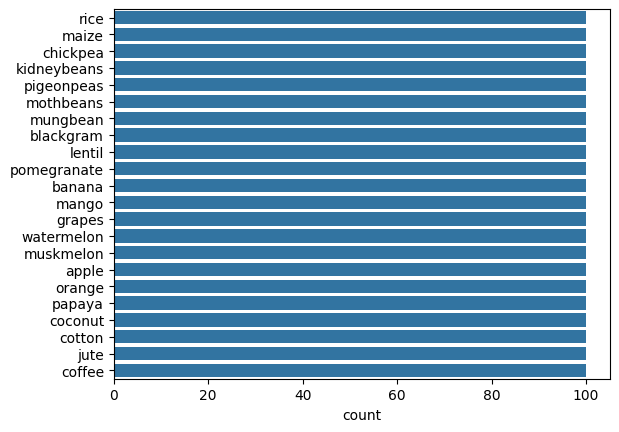

In [4]:
sns.countplot(df['label'])

C:\Users\Ayush\AppData\Local\Temp\ipykernel_22008\3725840187.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.boxplot(df).set_xticklabels(df.columns)


[Text(0, 0, 'N'),
 Text(1, 0, 'P'),
 Text(2, 0, 'K'),
 Text(3, 0, 'temperature'),
 Text(4, 0, 'humidity'),
 Text(5, 0, 'ph'),
 Text(6, 0, 'rainfall')]

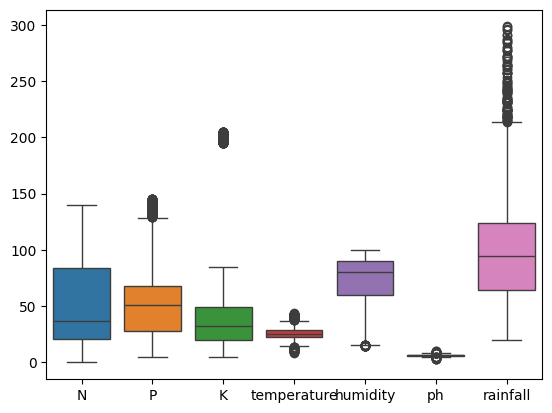

In [5]:
sns.boxplot(df).set_xticklabels(df.columns)

In [6]:
df = df.filter(pl.col('rainfall') < 230)
df = df.filter(pl.col('K') < 200)

In [7]:
df.shape

(2022, 8)

<Axes: xlabel='count'>

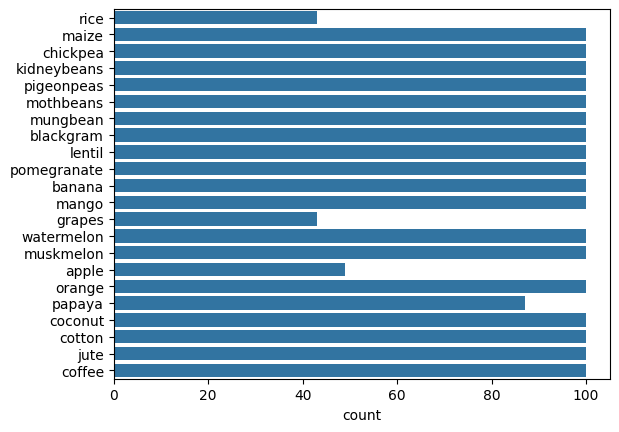

In [8]:
sns.countplot(df['label'])

In [9]:
df.filter(pl.col('label') == 'rice').shape

(43, 8)

In [10]:
# dis-proportionate stratified sampling for uniformity of data
df = pl.concat([
    df.filter(
        pl.col('label') == _unique
    ).sample(n = 40)
    for _unique in df['label'].unique()
], how = 'vertical')

<Axes: xlabel='count'>

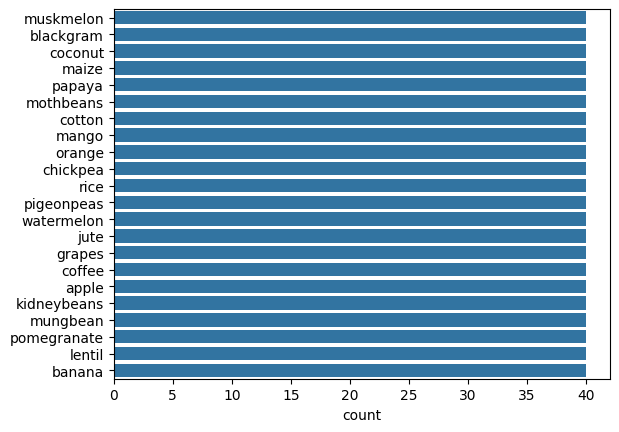

In [11]:
sns.countplot(df['label'])

In [12]:
df.shape

(880, 8)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
x = df.drop('label')
y = df['label']

In [15]:
scaler = StandardScaler()

In [16]:
columns = list()
scaled_df = pl.DataFrame(scaler.fit_transform(x))

df = pl.DataFrame({
    _col: scaled_df[f"column_{_index}"]
    for _index, _col in enumerate(x.columns)
})

In [17]:
df

N,P,K,temperature,humidity,ph,rainfall
f64,f64,f64,f64,f64,f64,f64
0.871261,-1.066904,0.003262,0.685262,1.025517,-0.404567,-1.483617
1.36721,-1.426672,0.103626,0.676686,1.014562,-0.472325,-1.544122
1.752948,-0.797078,0.003262,0.43326,0.974965,0.066382,-1.491216
1.725396,-1.426672,0.083553,0.421922,0.85528,0.337435,-1.513271
1.67029,-1.456653,0.043407,0.388396,0.91967,-0.09748,-1.520704
0.898814,-1.276769,0.103626,0.773211,0.969705,-0.398357,-1.57798
1.780501,-1.246788,0.083553,0.372869,1.061009,0.266757,-1.596838
1.036577,-1.096885,0.083553,0.844976,0.873018,0.217552,-1.510042
0.926367,-0.976962,0.143771,0.561769,1.053521,0.022835,-1.595507


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
models = [
    KNeighborsClassifier(i + 1)
    for i in range(10)
]

In [21]:
for model in models:
    model.fit(x_train, y_train)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
test_accuracies = [
    accuracy_score(y_test, model.predict(x_test))
    for model in models
]

train_accuracies = [
    accuracy_score(y_train, model.predict(x_train))
    for model in models
]

<Axes: >

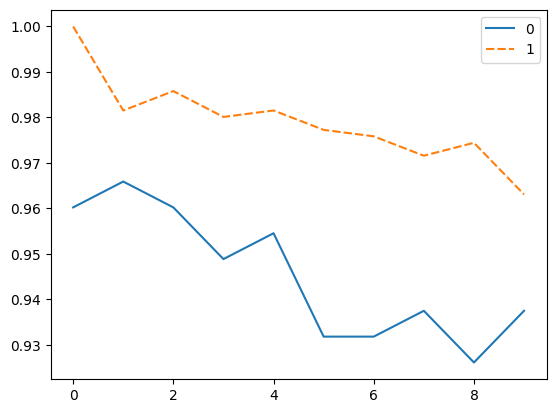

In [24]:
sns.lineplot([test_accuracies, train_accuracies])

In [25]:
model = KNeighborsClassifier(3)

In [26]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
accuracy_score(y_test, model.predict(x_test))

0.9602272727272727

In [28]:
# 98% accuracy. sufficient for now

In [29]:
import pickle as pkl

In [30]:
with open('scaler.pkl', 'wb') as file:
    pkl.dump(scaler, file)

with open('model.pkl', 'wb') as file:
    pkl.dump(model, file)